<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 24</b>: K Vecinos m√°s cercanos (KNN)</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. K vecinos m√°s cercanos (KNN)](#knn)
- [2. M√©tricas de distancia](#distancia)
- [3. Algoritmo](#algoritmo)
- [4. Hiperpar√°metros](#hiperparametros)
- [5. Uso no supervisado](#nosupervisado)
- [6. Ejemplo supervisado](#ejemplo_supervisado)
- [7. Ejemplo no supervisado](#ejemplo_nosupervisado)
- [8. Links de inter√©s](#links)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.datasets import make_regression
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## 1. K vecinos m√°s cercanos (KNN) <a name="knn"></a>

<img src="https://drive.google.com/uc?export=view&id=1FYHguUMcHpL33PcCnmSLQB5BHPCBAzvH" height="194" width="260" style="float: center;">

El modelo K vecinos m√°s cercanos (K-nearest neighbors o KNN) se utiliza para problemas supervisados de clasificaci√≥n y regresi√≥n.

Aunque suele ser m√°s utilizado para clasificaci√≥n.

Un nuevo dato se clasifica o se predice en funci√≥n de la mayor√≠a de las clases o valores de los K puntos de datos m√°s cercanos en el espacio de caracter√≠sticas.

Se selecciona una m√©trica de distancia en particular para determinar los vecinos.

#### Ejemplos

- Clasificar el riesgo crediticio (moroso / no moroso) de una persona basado en individuos similares.

- Predecir cu√°nto dinero gasta un cliente potencial en nuestro negocio en base a los 5 clientes m√°s similares a √©l y promediar sus gastos para hacer la predicci√≥n.

## 2. M√©tricas de distancia <a name="distancia"></a>

Las m√©tricas de distancia son funciones utilizadas para medir la proximidad o similitud entre dos puntos de datos en un modelo KNN.

Existen una gran cantidad de propuestas, pero las m√°s conocidas son las siguientes:

- **Euclidiana (Euclidean)**: Mide la distancia en l√≠nea recta entre dos puntos. Adecuada para datos num√©ricos.

- **Manhattan**: Mide la distancia como la diferencia de las coordenadas cartesianas de ambos puntos. Es adecuada para datos num√©ricos tambi√©n.

- **Minkowski**: Es un punto intermedio entre las dos anteriores.

- **Chebyshev**: Tambi√©n conocida como la distancia m√°xima entre la diferencia de alturas (eje Y) o de anchuras (eje X).

- **Coseno (Cosine)**: Utilizada para medir la similitud entre dos vectores.

- **Hamming**: Se utiliza para datos categ√≥ricos o binarios. Mide la diferencia entre dos cadenas de caracteres de igual longitud.

<img src="https://drive.google.com/uc?export=view&id=1PGRDjWO-ifjRvizoHsZ6sTFKes0p6Ylp" height="352" width="480" style="float: center;">

## 3. Algoritmo <a name="algoritmo"></a>

El modelo se construye en funci√≥n de unos pasos bien delimitados y definidos, que son los siguientes:

**1. Elegir k**: Se elige un valor para K, que representa el n√∫mero de puntos de datos m√°s cercanos que se considerar√°n para clasificar o predecir el nuevo punto de datos.

Un valor peque√±o puede llevar a un modelo m√°s ruidoso y sensible a valores at√≠picos (outliers), mientras que un valor elevado puede facilitar la toma de decisi√≥n.

**2. Medici√≥n de distancia**: Calcular la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.

**3. Identificaci√≥n de los K vecinos m√°s cercanos**: Se seleccionan los K puntos de datos m√°s cercanos.

**4. Predicci√≥n**: Si se trata de un problema de clasificaci√≥n, el nuevo punto se clasifica en la clase m√°s frecuente entre los K vecinos m√°s cercanos (votaci√≥n por mayor√≠a).

Si se trata de un problema de regresi√≥n, el valor objetivo para el nuevo punto se calcula como el promedio de los valores de los K vecinos m√°s pr√≥ximos.

El modelo no implica una fase de entrenamiento propiamente dicha, ya que todo el conjunto de entrenamiento se almacena en memoria para realizar las clasificaciones o predicciones en funci√≥n de los vecinos m√°s cercanos.

Es rendimiento de este modelo puede depender en gran medida del valor de K y de la elecci√≥n de la m√©trica de distancia.

Adem√°s, puede ser computacionalmente costoso para grandes conjuntos de datos, ya que debe calcular la distancia con todos los puntos de entrenamiento para cada predicci√≥n.

<img src="https://drive.google.com/uc?export=view&id=1OO0JcDcC8-VRQ-BScwwmD7931ZV6igYv" height="263" width="427" style="float: center;">

<img src="https://drive.google.com/uc?export=view&id=1xksbciRUb7p1QjuR72hd27LPFhDVs9u9" height="263" width="426" style="float: center;">

### ¬øC√≥mo elegir el valor de K?

Este n√∫mero no se puede calcular a priori y se aproxima en la fase de optimizaci√≥n de hiperpar√°metros.

Como se puede visualizar en la figura anterior, su valor puede decantar una predicci√≥n concreta hacia la contraria o la contraria.

En general, se recomienda tener un n√∫mero impar para k para evitar empates en la clasificaci√≥n, y las t√°cticas de validaci√≥n cruzada pueden ayudarlo a elegir el k √≥ptimo para su conjunto de datos.

## 4. Hiperpar√°metros <a name="hiperparametros"></a>

Podemos construir un modelo KNN f√°cilmente en Python utilizando la librer√≠a `scikit-learn` y las funciones `KNeighborsClassifier` y `KNeighborsRegressor`.

Algunos de sus hiperpar√°metros son:

**n_neighbors**: Es el valor K. Define el n√∫mero de vecinos que se considerar√°n para tomar decisiones de clasificaci√≥n o regresi√≥n.
Es uno de los hiperpar√°metros m√°s cr√≠ticos en KNN.

  Valores peque√±os de ùëò: el modelo es m√°s sensible a ruido en los datos.Tiende a sobreajustarse (overfitting).

  Valores grandes de ùëò: se suavizan las predicciones porque considera m√°s puntos. Tiende a subajustarse (underfitting).

**weights**: pesos de los vecinos. Determina si todos los vecinos contribuyen por igual o si los m√°s cercanos tienen mayor peso.

**metric**: Especifica c√≥mo se calcula la distancia entre los puntos.

**algorithm**: Determina el m√©todo usado para encontrar los vecinos m√°s cercanos.

## 5. Uso no supervisado <a name="nosupervisado"></a>

Se puede usar la t√©cnica de vecinos m√°s cercanos para tareas no supervisadas.

Realiza c√°lculos de distancias basados √∫nicamente en las caracter√≠sticas (features) de los datos.

Casos de usos m√°s comunes:
- Detecci√≥n de anomal√≠as.
- B√∫squeda de similitud entre datos.
- Sistemas de recomendaci√≥n.

In [ ]:
# Datos de ejemplo
X = [[0, 0], [1, 1], [2, 2], [3, 3]]

# Inicializamos el modelo
nn = NearestNeighbors(n_neighbors=2)
nn.fit(X)

# Encontrar los vecinos m√°s cercanos
distances, indices = nn.kneighbors([[1.5, 1.5]])

print(indices)  # √çndices de los vecinos m√°s cercanos
print(distances)  # Distancias a los vecinos m√°s cercanos

## 6. Ejemplo supevisado <a name="ejemplo_supervisado"></a>

### Clasificaci√≥n

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_iris.csv")

X = total_data.drop("specie", axis = 1)
y = total_data["specie"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22          -1.506521          1.249201          -1.567576         -1.315444
15          -0.173674          3.090775          -1.283389         -1.052180
65           1.038005          0.098217           0.364896          0.264142
11          -1.264185          0.788808          -1.226552         -1.315444
42          -1.748856          0.328414          -1.397064         -1.315444

In [3]:
# targert
total_data["specie"] = total_data["specie"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

El gr√°fico 3D nos permite analizar la separaci√≥n y distribuci√≥n de las clases en funci√≥n de las combinaciones de las 3 variables.

In [4]:
fig = px.scatter_3d(total_data, x = "petal width (cm)", y = "petal length (cm)", z = "sepal width (cm)", color = "specie", width = 1000, height = 500,
                    size = total_data["petal length (cm)"].abs(), color_discrete_sequence=["#E58139", "#39E581", "#8139E5"])
camera = dict(
    up = dict(x = 1, y = 3.5, z = 0),
    eye = dict(x = 2, y = 0, z = 0)
)

fig.update_layout(scene_camera = camera)
fig.show()

Para obtener m√°s informaci√≥n, podr√≠amos calcular un gr√°fico de dispersi√≥n para la relaci√≥n entre las variables de dos en dos (esto deber√≠a hacerse en el an√°lisis exploratorio de datos, EDA).

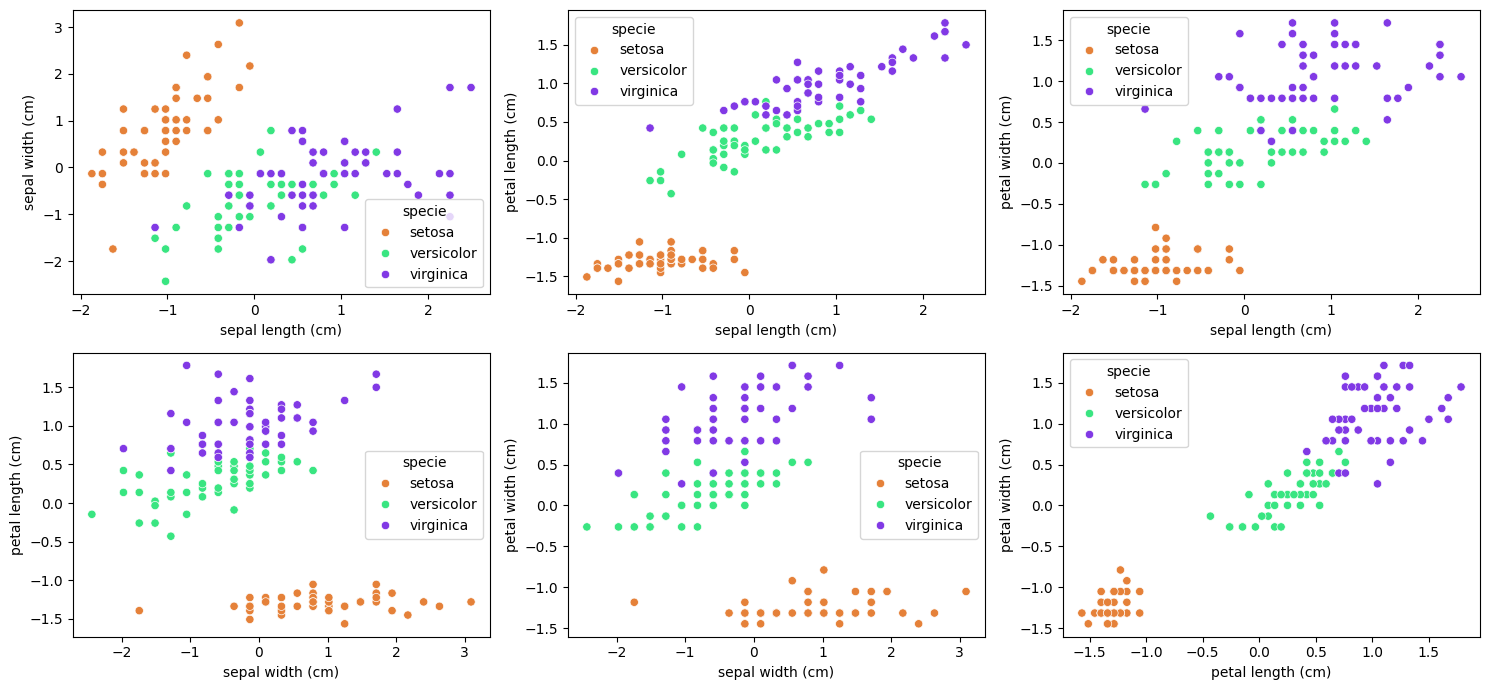

In [5]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = ["#E58139", "#39E581", "#8139E5"]
sns.scatterplot(ax = axis[0, 0], data = total_data, x = "sepal length (cm)", y = "sepal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = total_data, x = "sepal length (cm)", y = "petal length (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = total_data, x = "sepal length (cm)", y = "petal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = total_data, x = "sepal width (cm)", y = "petal length (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = total_data, x = "sepal width (cm)", y = "petal width (cm)", hue = "specie", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = total_data, x = "petal length (cm)", y = "petal width (cm)", hue = "specie", palette = palette)

plt.tight_layout()

plt.show()

Comparando los predictores uno por uno (para hacerlo m√°s gr√°fico y expl√≠cito), se observa mejor la separaci√≥n en funci√≥n de los valores de las clases. Por lo tanto, el modelo KNN tambi√©n es adecuado para resolver el problema.

In [6]:
# modelo
model = KNeighborsClassifier()

# entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# predicion
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [12]:
X_train.shape

(120, 4)

In [8]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)

Accuracy Test:  1.0
Accuracy Train:  0.9583333333333334


### ¬øSi cambiamos K?

In [10]:
k_range = range(2, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

([<matplotlib.axis.XTick at 0x799f4a689590>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

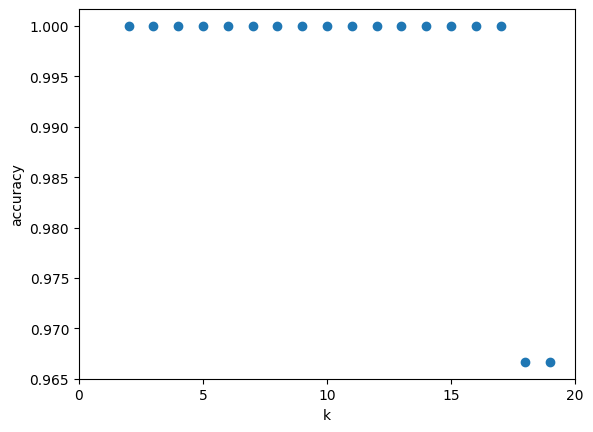

In [11]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')

plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### Regresi√≥n

Para ejemplificar la implementaci√≥n de un algoritmo KNN se generan datos al azar.

In [13]:
X, y = make_regression(n_samples = 1000, n_features = 4, noise = 1, random_state = 42)

X = pd.DataFrame(X, columns = ["Var1", "Var2", "Var3", "Var4"])

In [14]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

Var1      Var2      Var3      Var4
29  -0.518270  0.357113  1.477894 -0.219672
535  0.457687 -2.120700 -0.606865 -2.238231
695 -0.224633  0.940771 -0.982487 -0.989628
557  0.360648 -0.320298  1.643378 -2.077812
836 -0.307962 -0.144519 -0.792420 -0.675178

In [15]:
total_data = X.copy()
total_data["target"] = y

fig = px.scatter_3d(total_data, x = "Var1", y = "Var2", z = "Var3", color = "target", width = 1000, height = 500,
                    size = total_data["Var4"].abs())
camera = dict(
    up = dict(x = 1, y = 3.5, z = 0),
    eye = dict(x = 2, y = 0, z = 0)
)

fig.update_layout(scene_camera = camera)
fig.show()

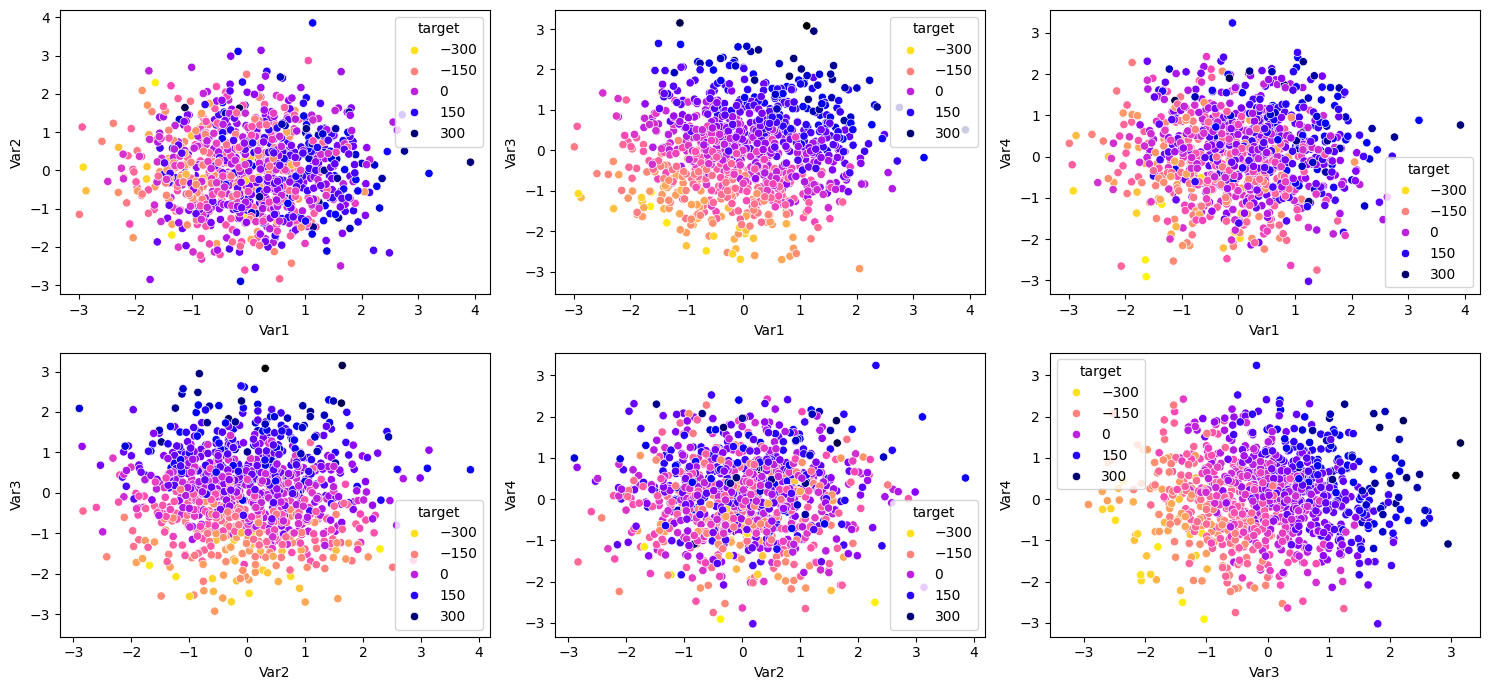

In [16]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = sns.color_palette("gnuplot2_r", as_cmap=True)
sns.scatterplot(ax = axis[0, 0], data = total_data, x = "Var1", y = "Var2", hue = "target", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = total_data, x = "Var1", y = "Var3", hue = "target", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = total_data, x = "Var1", y = "Var4", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = total_data, x = "Var2", y = "Var3", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = total_data, x = "Var2", y = "Var4", hue = "target", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = total_data, x = "Var3", y = "Var4", hue = "target", palette = palette)

plt.tight_layout()

plt.show()

In [17]:
# modelo
model = KNeighborsRegressor()

# entrenamiento
model.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
# prediccion
y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

In [21]:
# metricas
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("==> Test")
print("MSE Test: ", mse_test)
print("RMSE Test: ", rmse_test)
print("R2 test: ", r2_test)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("==> Train")
print("MSE train: ", mse_train)
print("RMSE train: ", rmse_train)
print("R2 train: ", r2_train)

==> Test
MSE Test:  564.8367646867368
RMSE Test:  23.766294719344387
R2 test:  0.9547914514799766
==> Train
MSE train:  429.44806896885143
RMSE train:  20.723128841197013
R2 train:  0.9710600977517


## 7. Ejemplo no supervisado <a name="ejemplo_nosupervisado"></a>

In [22]:
# Cargar el conjunto de datos Wine
wine = load_wine()

# selecci√≥n de atributos
X = wine.data  # Caracter√≠sticas (columnas)
y = wine.target  # Etiquetas (clases)

# Convertir a un DataFrame para una mejor visualizaci√≥n
df = pd.DataFrame(X, columns=wine.feature_names)
df['class'] = y

df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [23]:
df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [28]:
# Crear el modelo NearestNeighbors
# n_neighbors: n√∫mero de vecinos a buscar
# metric: m√©trica de distancia (por defecto 'minkowski' con p=2 -> distancia Euclidiana)
nbrs = NearestNeighbors(n_neighbors=10, metric='euclidean')

# entrenamiento
nbrs.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=10)

In [29]:
# Tomar un punto de prueba (por ejemplo, el quinto punto del dataset)
# Necesitamos reshape para que sea un array bidimensional
test_point = X[4].reshape(1, -1)
test_point

array([[1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [30]:
# Encontrar los vecinos m√°s cercanos al punto de prueba
distances, indices = nbrs.kneighbors(test_point)

# Mostrar resultados
print("\nPunto de prueba:", test_point)
print("√çndices de los vecinos m√°s cercanos:", indices)
print("Distancias a los vecinos m√°s cercanos:", distances)


Punto de prueba: [[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
√çndices de los vecinos m√°s cercanos: [[  4  68 168 174 173  78 155  39 136 100]]
Distancias a los vecinos m√°s cercanos: [[ 0.         17.72868015 20.77652521 22.42155882 24.14925879 24.39890366
  27.45302169 28.10955531 32.9042748  32.91059708]]


In [31]:
# Visualizar los vecinos m√°s cercanos en el dataset
nearest_points = df.iloc[indices[0]]

nearest_points

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
4      13.24        2.59  2.87               21.0      118.0           2.80   
68     13.34        0.94  2.36               17.0      110.0           2.53   
168    13.58        2.58  2.69               24.5      105.0           1.55   
174    13.40        3.91  2.48               23.0      102.0           1.80   
173    13.71        5.65  2.45               20.5       95.0           1.68   
78     12.33        0.99  1.95               14.8      136.0           1.90   
155    13.17        5.19  2.32               22.0       93.0           1.74   
39     14.22        3.99  2.51               13.2      128.0           3.00   
136    12.25        4.72  2.54               21.0       89.0           1.38   
100    12.08        2.08  1.70               17.5       97.0           2.23   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
4          2.69                  0.39             1.82             4.32  1.04   
68         1.30                  0.55             0.42             3.17  1.02   
168        0.84                  0.39             1.54             8.66  0.74   
174        0.75                  0.43             1.41             7.30  0.70   
173        0.61                  0.52             1.06             7.70  0.64   
78         1.85                  0.35             2.76             3.40  1.06   
155        0.63                  0.61             1.55             7.90  0.60   
39         3.04                  0.20             2.08             5.10  0.89   
136        0.47                  0.53             0.80             3.85  0.75   
100        2.17                  0.26             1.40             3.30  1.27   

     od280/od315_of_diluted_wines  proline  class  
4                            2.93    735.0      0  
68                           1.93    750.0      1  
168                          1.80    750.0      2  
174                          1.56    750.0      2  
173                          1.74    740.0      2  
78                           2.31    750.0      1  
155                          1.48    725.0      2  
39                           3.53    760.0      0  
136                          1.27    720.0      2  
100                          2.96    710.0      1

## 8. Links de inter√©s <a name="links"></a>

- [Nearest Neighbors con Scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)
- [Clasificaci√≥n K vecinos m√°s pr√≥ximos](https://www.datacamp.com/es/tutorial/k-nearest-neighbor-classification-scikit-learn)
- [Algoritmo KNN ‚Äì c√≥mo funciona y ejemplos en Python](https://www.themachinelearners.com/algoritmo-knn/)